## Vilnius real estate used Apartment market analysis

* Purpose: analyse Vilnius real estate pricing changes during Covid-19 and post-Covid period (est. 2020.05-2020.08)
* Hypothesis: The uncertainty brought by Covid-19 should bring fluctuations in Vilnius real estate markets.
* Predictions:
  * 1. Increase in supply for apartments selling due to short-term rent demand drop and potential purchases hesitation due to market changes.
  * 2. Decrease in prices due to plummeting demand and potential increase of supply.

* Scope: data from one of main the Lithuanian real estate market portals used.
* Data loaded weekly to monitor market changes.
* New apartments (year > 2019) are excluded from analysis as only partial data of their full supply and pricing are  available.
* only furnished apartments are included in the analysis.  
### Weak points
* The apartments being sold data is available from April. A better picture would have been having the data from as early as January.
* The apartments being rented data is available from May. A better picture would also require early data, such as start of 2020.
* Spikes in weeks' data possible. Preferred way would be to load data daily and smooth out edges with weekly averages. Daily scrapping is out of scope owever.
* Data is based on posts and not actual objects in the market. There exists a practice of same object(apartment) postings in multiple districts (to make the object more visible and sell faster), that contributes to duplicate data. This duplicate data for the moment remains in dataset to support analysis splitting data into districts. 
* More sources could be included for analysis. This however can also result in duplicates.


### Importing  & initial preparation of data

In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
from toai.imports import *
%matplotlib notebook
#%matplotlib inline
import data_prep
import plotly
from plotly.offline import plot, iplot

C:\Users\tiesi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\tiesi\Anaconda3\lib\site-packages\toai\imports.py:79: UserWarning: Could not find kaggle.json. Make sure it's located in C:\Users\tiesi\.kaggle. Or use the environment method.
  warnings.warn(str(error))


In [2]:
df_raw = data_prep.create_df_raw()

df_raw.head()

log_date    district         street  year  total_price  price_sq_m  \
ID                                                                        
3  2020-04-09  Antakalnis  Antakalnio g.  2000       114000      1713.0   
4  2020-04-09  Antakalnis  Antakalnio g.  1964        83000      1413.0   
5  2020-04-09  Antakalnis  Antakalnio g.  1967        99000      1378.0   
6  2020-04-09  Antakalnis  Antakalnio g.  1963        67500      1646.0   
8  2020-04-09  Antakalnis  Antakalnio g.  1940       100000      1658.0   

    nr_rooms  space_sq_m  floor  nr_floors  week  
ID                                                
3          2       66.54      4          4    15  
4          3       58.75      5          5    15  
5          3       71.86      5          5    15  
6          2       41.00      5          5    15  
8          2       60.33      1          3    15

####  Removing the outlayers
* Quantiles will be calculated individually for each day when the data was collected.
* Bottom 1 and top 1 % of the data will be removed from each day to deal with outlyers.


In [61]:
# Building table without outlyers and aggregated statistics table
df, df_agg = data_prep.create_df(df_raw)

<IPython.core.display.Javascript object>


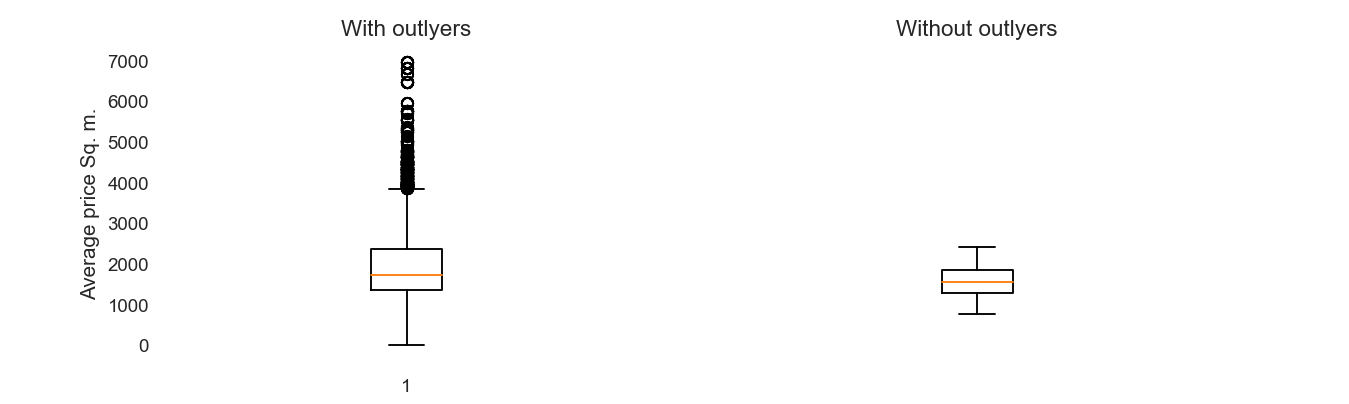

In [12]:

fig1 = plt.figure('Posts distribution Boxplot review',figsize=(10,3))
ax1 = plt.subplot(1, 2, 1)
plt.boxplot(df_raw['price_sq_m'])
plt.ylabel('Average price Sq. m.')
plt.title('With outlyers')
#ax1.grid()
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.boxplot(df['price_sq_m'])
plt.title('Without outlyers')
plt.axis('off')

plt.show()

<IPython.core.display.Javascript object>


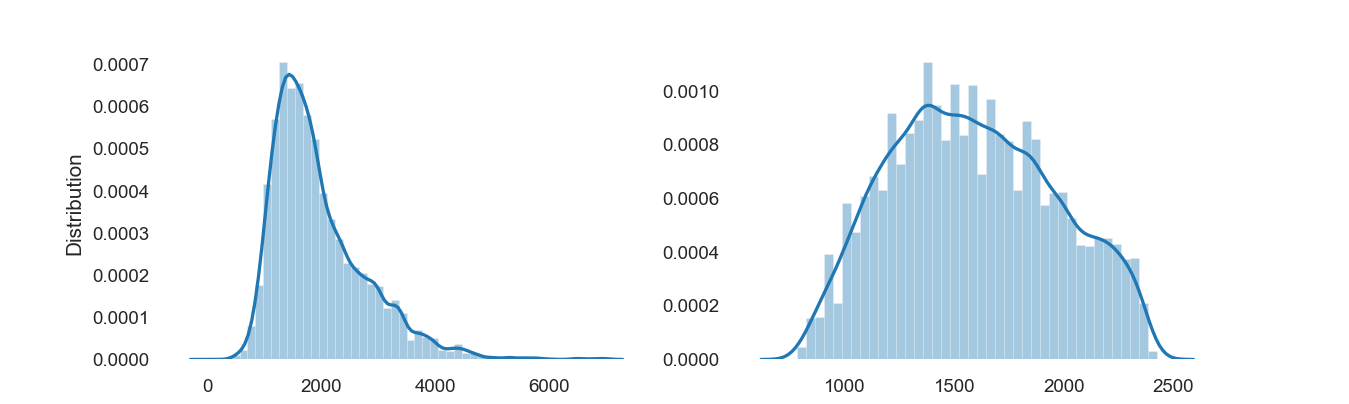

In [13]:
fig2 = plt.figure('Posts distribution plot review', figsize=(10,3))
ax3 = plt.subplot(1, 2, 1)
sns.distplot(df_raw['price_sq_m']);
plt.ylabel('Distribution')
plt.xlabel('Average price Sq. m.')
#plt.title('With outlyers')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax4 = plt.subplot(1, 2, 2)
sns.distplot(df['price_sq_m']);
plt.xlabel('Average price Sq. m.')
#plt.boxplot(df['price_sq_m'])
#plt.title('Without outlyers')
#plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


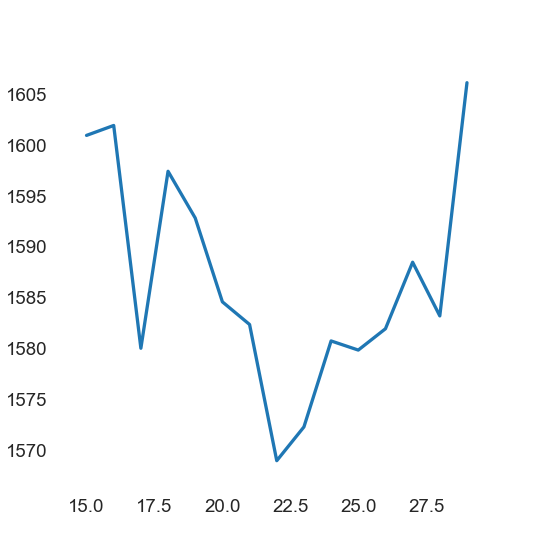

In [14]:
fig3 = plt.figure(figsize=(4,4))
plt.plot(df_agg['Mean'])
plt.ylabel('Average price per square meter')
#axes = plt.gca()
#axes.set_xlim([0,2500])SS
#axes.set_ylim([1800,1850])
plt.show()

<IPython.core.display.Javascript object>


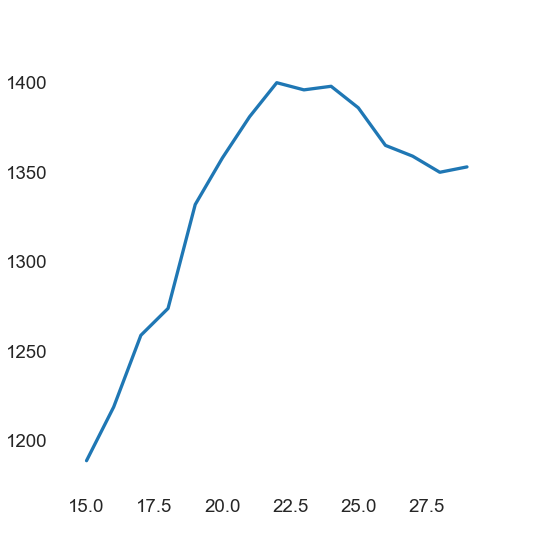

In [15]:
fig4 = plt.figure(figsize=(4,4))
plt.plot(df_agg['nr_objects'])
plt.ylabel('number of posts')
#axes = plt.gca()
#axes.set_xlim([0,2500])
#axes.set_ylim([1500,2200])
plt.show()

In [ ]:
# plt.plot( 'log_date', 'Q1', data=quantiles_range, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'log_date', 'Q2', data=quantiles_range, marker='', color='olive', linewidth=2)
# plt.plot( 'log_date', 'Q3', data=quantiles_range, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()

## Creation of data buckets for further analysis
* 3 Different apartment size buckets will be investigated:
  * < ~46 square meters. Small apartment category.
  * 46 to 66 square meters. Medium apartment category.
  * 66 to 120 square meters. Large apartment category.
* Categorization built based on Quantile-based discretization function towards three splits.

In [66]:
df['size_bucket'] = pd.qcut(df['space_sq_m'], q=3, labels=["small", "medium", "large"])
#df.groupby('size_bucket')['price_sq_m', 'space_sq_m'].agg(['mean', 'count', 'min', 'max'])

size_bucket_data = df.groupby(['size_bucket', 'week'])['price_sq_m'].agg(['mean', 'count'])
size_bucket_data = size_bucket_data.reset_index(level=['size_bucket', 'week'])
size_bucket_data = size_bucket_data.set_index('week')
size_bucket_data.rename(columns={'mean':'avg. price sq. m.',
                          'count':'nr. of posts',
                                }, 
                 inplace=True)
 
size_bucket_data.head()

size_bucket  avg. price sq. m.  nr. of posts
week                                             
15         small        1594.626536           407
16         small        1590.580336           417
17         small        1576.320988           405
18         small        1594.831354           421
19         small        1603.186147           462

In [67]:
import plotly.express as px

fig = px.line(size_bucket_data, 
              x=size_bucket_data.index,
              y=size_bucket_data['nr. of posts'],
              color="size_bucket",
              title="Number of posts per size bucket")
fig.show()

In [68]:
import plotly.express as px

fig = px.line(size_bucket_data, 
              x=size_bucket_data.index,
              y=size_bucket_data['avg. price sq. m.'],
              color="size_bucket",
              title="Average price square meter per size bucket")
fig.show()

## District & street Rankings

In [69]:
#street ranking calculation
streets = df.groupby('street')['price_sq_m'].agg(['mean'])
streets['street_rank'] = pd.qcut(streets['mean'], q=5,  labels=[5, 4, 3,2,1])
#district ranking calculation
districts = df.groupby('district')['price_sq_m'].agg(['mean'])
districts['district_rank'] = pd.qcut(districts['mean'], q=5,  labels=[5, 4, 3,2,1])
                               
df = pd.merge(df, districts['district_rank'], on='district', how='outer')
df = pd.merge(df, streets['street_rank'], on='street', how='outer')

In [74]:
district_data = df.groupby(['size_bucket','district_rank', 'week'])['price_sq_m'].agg(['mean', 'count'])
district_data = district_data.reset_index(level=['size_bucket','district_rank', 'week'])
district_data = district_data.set_index('week')
district_data.rename(columns={'mean':'avg. price sq. m.',
                          'count':'nr. of posts',
                                }, 
                 inplace=True)
 
district_data.head()

size_bucket district_rank  avg. price sq. m.  nr. of posts
week                                                           
15         small             5        1128.076923            52
16         small             5        1129.358491            53
17         small             5        1117.000000            51
18         small             5        1128.800000            50
19         small             5        1130.018868            53

In [79]:
district_data[district_data['size_bucket'] == "small"]
district_data[district_data['district_rank'] == 1]

size_bucket district_rank  avg. price sq. m.  nr. of posts
week                                                           
15         small             1        1837.444444            36
16         small             1        1815.277778            36
17         small             1        1795.454545            33
18         small             1        1870.800000            35
19         small             1        1852.292683            41
20         small             1        1861.023810            42
21         small             1        1809.222222            45
22         small             1        1790.653061            49
23         small             1        1796.326923            52
24         small             1        1795.148936            47
25         small             1        1812.086957            46
26         small             1        1833.760000            50
27         small             1        1853.260000            50
28         small             1        1842.562500            48
29         small             1        1868.437500            48
15        medium             1        2051.333333            45
16        medium             1        2083.062500            48
17        medium             1        1936.469388            49
18        medium             1        2073.775510            49
19        medium             1        2023.521739            46
20        medium             1        2036.177778            45
21        medium             1        2015.434783            46
22        medium             1        1999.558140            43
23        medium             1        1998.244444            45
24        medium             1        2020.255814            43
25        medium             1        2052.266667            45
26        medium             1        2018.333333            45
27        medium             1        1989.437500            48
28        medium             1        2005.866667            45
29        medium             1        2023.488889            45
15         large             1        1928.200000            60
16         large             1        1921.644068            59
17         large             1        1738.756098            82
18         large             1        1856.723077            65
19         large             1        1886.433333            60
20         large             1        1901.609375            64
21         large             1        1924.523810            63
22         large             1        1905.833333            66
23         large             1        1893.060606            66
24         large             1        1889.746032            63
25         large             1        1911.196970            66
26         large             1        1958.918033            61
27         large             1        1946.048387            62
28         large             1        1913.733333            60
29         large             1        1974.088235            68

In [82]:
import plotly.express as px

#d_small = district_data[district_data['size_bucket'] == "small"]
d_small = district_data[district_data['district_rank'] == 1]

fig = px.line(d_small, 
              x=d_small.index,
              y=d_small['avg. price sq. m.'],
              color="size_bucket",
              title="rank 1  districts distribution")
fig.show()

In [83]:
#d_small = district_data[district_data['size_bucket'] == "small"]
d_small = district_data[district_data['district_rank'] == 2]

fig = px.line(d_small, 
              x=d_small.index,
              y=d_small['avg. price sq. m.'],
              color="size_bucket",
              title="rank 2 districts distribution")
fig.show()

In [84]:
#d_small = district_data[district_data['size_bucket'] == "small"]
d_small = district_data[district_data['district_rank'] == 3]

fig = px.line(d_small, 
              x=d_small.index,
              y=d_small['avg. price sq. m.'],
              color="size_bucket",
              title="rank 3 districts distribution")
fig.show()

In [85]:
#d_small = district_data[district_data['size_bucket'] == "small"]
d_small = district_data[district_data['district_rank'] == 4]

fig = px.line(d_small, 
              x=d_small.index,
              y=d_small['avg. price sq. m.'],
              color="size_bucket",
              title="rank 4 districts distribution")
fig.show()

In [86]:
#d_small = district_data[district_data['size_bucket'] == "small"]
d_small = district_data[district_data['district_rank'] == 5]

fig = px.line(d_small, 
              x=d_small.index,
              y=d_small['avg. price sq. m.'],
              color="size_bucket",
              title="rank 5 districts distribution")
fig.show()

In [92]:
#df.head()

#districts.head
# districts_ranked = df.groupby('district_rank')['price_sq_m'].agg(['count','mean'])
# districts_ranked['district_rank2'] = pd.qcut(districts_ranked['mean'], q=10)
# districts_ranked.sort_values(by=['district_rank'])
#df.groupby('district_rank')['price_sq_m'].agg(['mean'])

#df['district']['district_rank'] == 1

df_test1 = df.groupby(['district','district_rank'])['price_sq_m'].agg(['mean','size'])
df_test1 = df_test1.dropna()

#df_test1[df_test1['district_rank']==1]
df_test1 = df_test1.reset_index()

In [116]:

df
# #df['space_sq_m']
# #df = df.reset_index()
# df['size_bucket'] = df.apply(define_size_bucket, axis=1)
# #df2['district_bucket'] = df2.apply(define_district_bucket, axis=1)

ID   log_date          district         street  year  total_price  \
0     NaN 2020-04-09        Antakalnis  Antakalnio g.  2000       114000   
1     NaN 2020-04-09        Antakalnis  Antakalnio g.  1964        83000   
2     NaN 2020-04-09        Antakalnis  Antakalnio g.  1967        99000   
3     NaN 2020-04-09        Antakalnis  Antakalnio g.  1963        67500   
4     NaN 2020-04-09        Antakalnis  Antakalnio g.  1940       100000   
...    ..        ...               ...            ...   ...          ...   
20014 NaN 2020-06-03  Didieji Gulbinai     Skalvos g.  2016       145000   
20015 NaN 2020-06-10  Didieji Gulbinai     Skalvos g.  2016       145000   
20016 NaN 2020-06-17  Didieji Gulbinai     Skalvos g.  2016       145000   
20017 NaN 2020-06-24  Didieji Gulbinai     Skalvos g.  2016       145000   
20018 NaN 2020-07-02  Didieji Gulbinai     Skalvos g.  2016       145000   

       price_sq_m  nr_rooms  space_sq_m  floor  nr_floors  week district_rank  \
0          1713.0         2       66.54      4          4    15             2   
1          1413.0         3       58.75      5          5    15             2   
2          1378.0         3       71.86      5          5    15             2   
3          1646.0         2       41.00      5          5    15             2   
4          1658.0         2       60.33      1          3    15             2   
...           ...       ...         ...    ...        ...   ...           ...   
20014      1726.0         3       84.00      2          2    23             2   
20015      1726.0         3       84.00      2          2    24             2   
20016      1726.0         3       84.00      2          2    25             2   
20017      1726.0         3       84.00      2          2    26             2   
20018      1726.0         3       84.00      2          2    27             2   

      street_rank  
0               3  
1               3  
2               3  
3               3  
4               3  
...           ...  
20014           3  
20015           3  
20016           3  
20017           3  
20018           3  

[20019 rows x 14 columns]

In [39]:
# #buckets calculation:
# apartment_sizes = df.groupby(['size_bucket', 'log_date']).aggregate(np.mean)
# apartment_sizes = apartment_sizes.sort_values(by=['price_sq_m'], ascending=False)
# apartment_sizes.reset_index(inplace=True)  
# apartment_sizes = apartment_sizes.set_index('log_date')
# apartment_sizes.sort_index
# #apartment_sizes

In [37]:


# #small_ap = apartment_sizes[apartment_sizes['size_bucket']==1]
# #small_ap
# plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==3], label='1')
# #line_down = plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==2], label='2')
# #plt.legend([line_up, line_down]
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==3], label='3')
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==4], label='4')
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==5], label='5')
# #plt.ylabel('Mean')
# plt.show()
# #apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==1]

                                    

In [15]:
#apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==1]

## Correlation initial Analysis

In [117]:
df.columns
potentialFeatures = [ 'year', 'total_price',
       'price_sq_m',  'nr_rooms', 'space_sq_m',
        'floor', 'nr_floors', 'street_rank', 'district_rank' ]
    #   'size_bucket', 'district_rank', 'street_rank']
# check how the features are correlated with the price  sq m
for f in potentialFeatures:
    related = df['price_sq_m'].corr(df[f])
    print("%s: %f" % (f,related))

year: 0.245804
total_price: 0.523224
price_sq_m: 1.000000
nr_rooms: -0.035650
space_sq_m: 0.037681
floor: -0.090131
nr_floors: -0.073815
street_rank: -0.733378
district_rank: -0.565840


<bound method Series.mean of 0        2
1        2
2        2
3        2
4        2
        ..
20014    2
20015    2
20016    2
20017    2
20018    2
Name: district_rank, Length: 20019, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]>

<IPython.core.display.Javascript object>


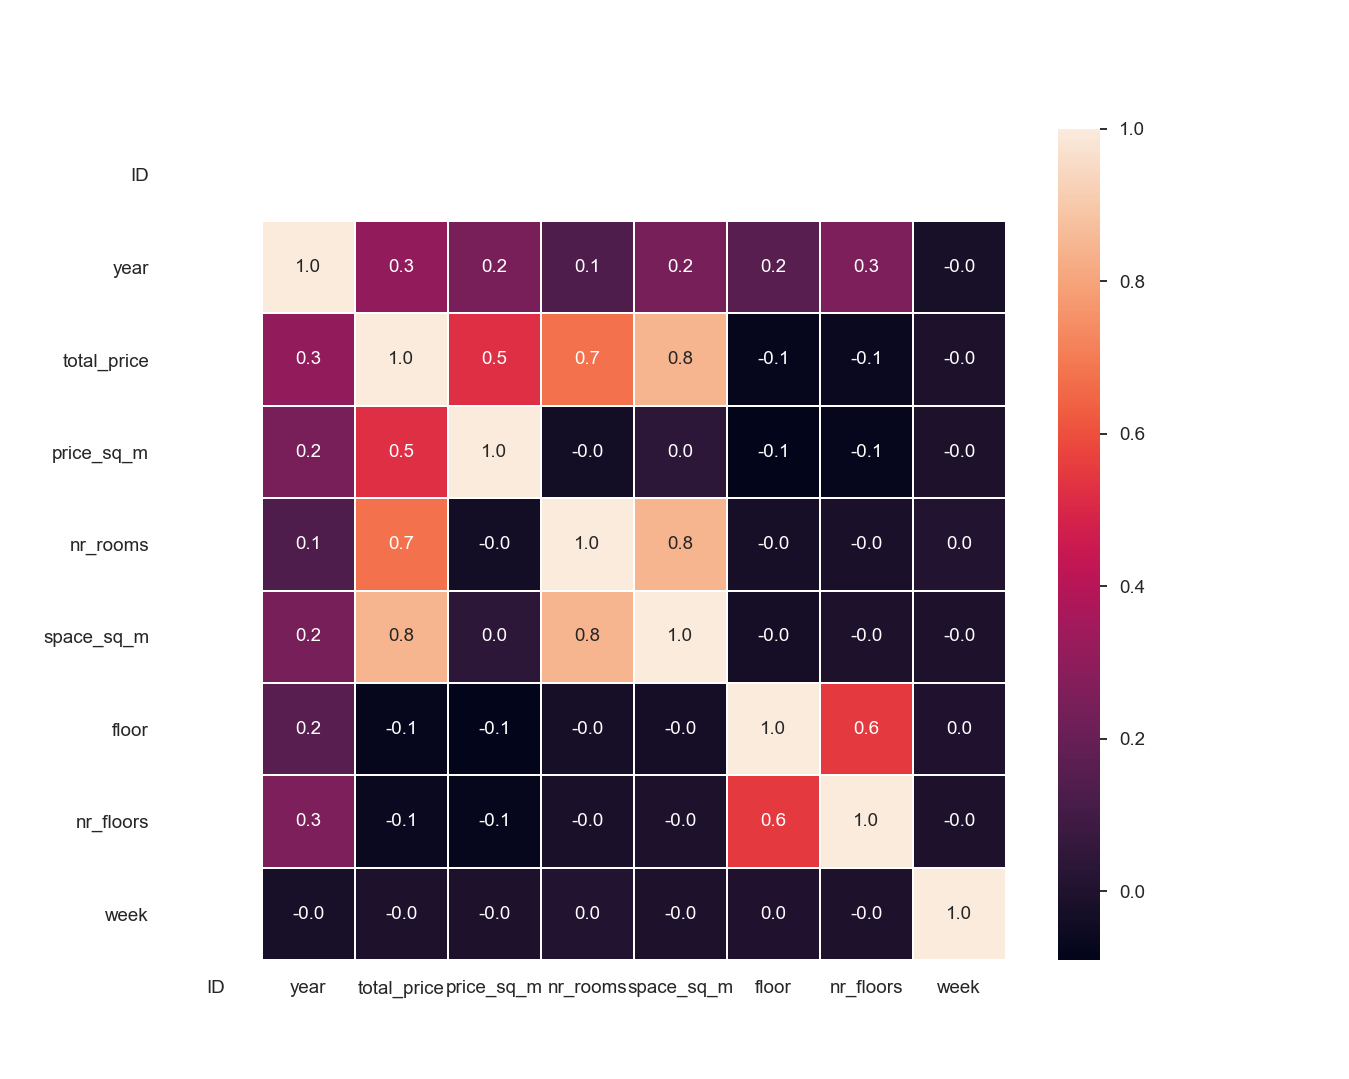

In [120]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

C:\Users\tiesi\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


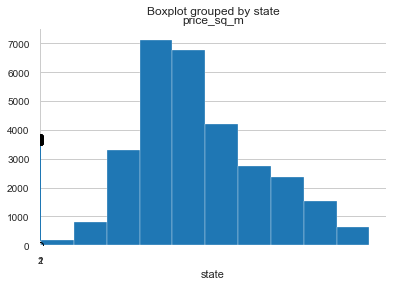

In [58]:
df.boxplot(column='price_sq_m', by='state')
df.price_sq_m.hist()

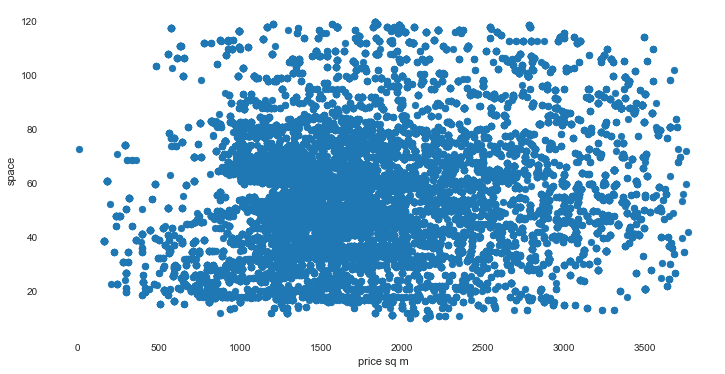

In [59]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['price_sq_m'], df['space_sq_m'])
ax.set_xlabel('price sq m')
ax.set_ylabel('space')
plt.show()

# Map work

In [30]:
import geopandas as gpd
import osmnx as ox
import networkx

Vilnius_map = "Vilnius,Lithuania"
graph = ox.graph_from_place(Vilnius_map)
networkx.classes.multidigraph.MultiDiGraph

nodes , streets_gdf = ox.graph_to_gdfs(graph)

<IPython.core.display.Javascript object>


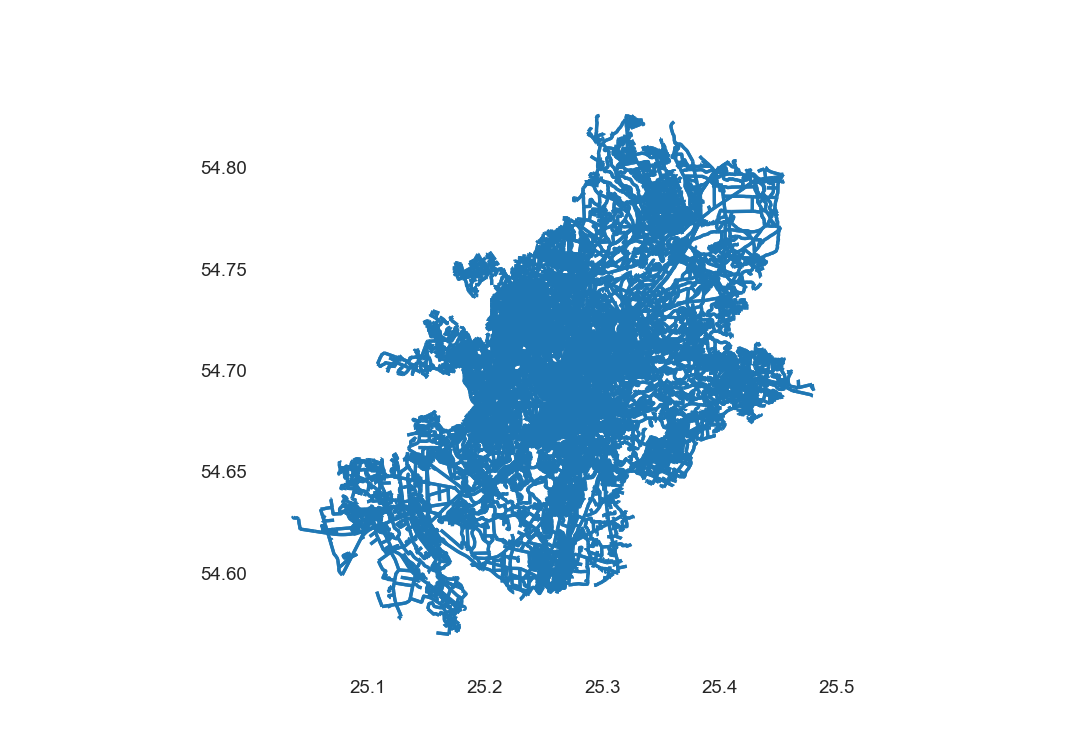

In [50]:
#streets.head()
#streets_gdf.head()
#streets_gdf = pd.merge(streets_gdf, streets['mean'], left_on='name', right_on='left')


fig2 =streets_gdf.plot()
#fig2 = plt.figure(figsize=(15,10))
#fig2.show()

osmid               name       highway  oneway   length   service  \
0  210992803     Kaniaviškių g.   residential   False   29.661       NaN   
1  210992803     Kaniaviškių g.   residential   False  123.459       NaN   
2  701261457                NaN       service   False   71.096  driveway   
3  701261457                NaN       service   False   71.096  driveway   
4  210992802  Kazio Bizausko g.  unclassified   False   33.843       NaN   

  maxspeed                                           geometry lanes  ref  \
0      NaN  LINESTRING (25.39225 54.67607, 25.39271 54.67609)   NaN  NaN   
1      NaN  LINESTRING (25.39225 54.67607, 25.39034 54.67596)   NaN  NaN   
2      NaN  LINESTRING (25.39225 54.67607, 25.39233 54.67543)   NaN  NaN   
3      NaN  LINESTRING (25.39233 54.67543, 25.39225 54.67607)   NaN  NaN   
4       50  LINESTRING (25.39792 54.67697, 25.39787 54.67727)   NaN  NaN   

  tunnel access bridge width junction           u           v  key  
0    NaN    NaN    NaN   NaN      NaN  6585974785  5632274275    0  
1    NaN    NaN    NaN   NaN      NaN  6585974785  4648073626    0  
2    NaN    NaN    NaN   NaN      NaN  6585974785  6585974786    0  
3    NaN    NaN    NaN   NaN      NaN  6585974786  6585974785    0  
4    NaN    NaN    NaN   NaN      NaN  6585974787  4587639180    0

Code below is either not used or to be used later:

In [20]:
#Skewness
# -1 / + 1 is considered regular
print(df['price_sq_m'].skew())
df['price_sq_m'].describe()

0.6931807408225388


count    25808.000000
mean      1850.834857
std        651.830500
min         10.000000
25%       1361.000000
50%       1714.000000
75%       2245.000000
max       3732.000000
Name: price_sq_m, dtype: float64

In [21]:
#Outlier treatment
#Quantile-based Flooring and Capping
Q1 = df['price_sq_m'].quantile(0.05)
Q3 = df['price_sq_m'].quantile(0.95)
print(Q1)
print(Q3)


data_1 = df[df['price_sq_m'] > Q1]
data_1 = df[df['price_sq_m'] < Q3]
print(data_1.shape)
#skewness differences
print(df['price_sq_m'].skew())
print(data_1['price_sq_m'].skew())


1006.0
3156.0
(24488, 15)
0.6931807408225388
0.5273906573676825


In [ ]:
#trimming
index = data[(data1['price_sq_m'] >= 3156.0)|(data['price_sq_m'] <= 1113.19)].index
data.drop(index, inplace=True)
data['price_sq_m'].describe()

In [ ]:
#IQR Score
#The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.
df3 = df['price_sq_m']

df_out = df3[~((df3 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

In [183]:
#date calculations
period = data_1.groupby('log_date').aggregate(np.mean)
period.head(5)

is_new_project  reserved  price_change  is_auction  nr_stars  \
log_date                                                                   
2020-04-09        0.068239  0.016792      0.039741    0.023580  0.440157   
2020-04-10        0.069414  0.016269      0.040334    0.024223  0.438539   
2020-04-11        0.065789  0.016003      0.039469    0.021693  0.390825   
2020-04-12        0.067116  0.015980      0.039712    0.021662  0.348722   
2020-04-13        1.000000  1.000000      0.040013    1.000000  0.322557   

                   year    total_price   price_sq_m  rounded_price_sq_m  \
log_date                                                                  
2020-04-09  1996.252233  122150.586995  1911.601286         1913.504823   
2020-04-10  1996.203181  121593.971800  1909.622560         1911.641359   
2020-04-11  1996.438122  122126.564367  1913.283428         1915.291607   
2020-04-12  1996.610440  122044.691761  1913.732244         1915.838068   
2020-04-13  1996.307112  121843.280532  1912.396911         1914.547414   

            nr_rooms  space_sq_m  rounded_space_sq_m     floor  nr_floors  \
log_date                                                                    
2020-04-09  2.467310   62.572008           62.574848  3.389425   6.643087   
2020-04-10  2.461678   62.394624           62.398771  3.392986   6.654736   
2020-04-11  2.466572   62.544733           62.548720  3.403627   6.656117   
2020-04-12  2.463778   62.482724           62.486506  3.400568   6.658026   
2020-04-13  2.459770   62.463696           62.465876  3.418822   6.672055   

               state  type  size_bucket  
log_date                                 
2020-04-09  1.635584   1.0     2.964987  
2020-04-10  1.626537   1.0     2.954447  
2020-04-11  1.636913   1.0     2.964794  
2020-04-12  1.634233   1.0     2.960582  
2020-04-13  1.642960   1.0     2.958693

In [ ]:

# # district buckets:
# first_tier =['Senamiestis','Žvėrynas','Užupis', 'Filaretai']
# second_tier = ['Valakampiai','Naujamiestis', 'Šnipiškės','Turniškės']
# third_tier = ['Antakalnis', 'Šiaurės miestelis','Žirmūnai', 'Burbiškės', 'Visoriai',
#             'Avižienių k.', 'Tarandės k.', 'Verkiai','Markučiai','Santariškės', 'Saulėtekis']
# fourth_tier = ['Klevinės vs.','Baltupiai','Bajorai','Lazdynėliai','Pilaitė',
# 'Šeškinė','Viršuliškės','Jeruzalė','Vilkpėdė','Liepkalnis','Karoliniškės','Pašilaičiai','Rasos',
# 'Lazdynai','Dvarčionys','Avižieniai','Justiniškės','Bendorių k.','Kalnėnai','Fabijoniškės',
# 'Bukiškio k.','Tarandė','Skaidiškės','Bukčiai','Balsiai','Naujininkai']

# def define_district_bucket(df2):
#   if df2['district'] in first_tier:
#     return 1
#   elif df2['district'] in second_tier:
#     return 2
#   elif df2['district'] in third_tier:
#     return 3
#   elif df2['district'] in fourth_tier:
#     return 4
#   else:
#     return 5

# df2['size_bucket'] =  
# 		,CASE	WHEN a.space_sq_m < 30  THEN 1
# 				WHEN a.space_sq_m >= 30 and a.space_sq_m < 50 THEN 2
# 				WHEN a.space_sq_m >= 50 and a.space_sq_m < 70 THEN 3
# 				WHEN a.space_sq_m >= 70 and a.space_sq_m < 90 THEN 4
# 				ELSE 5
# 				END AS [size_bucket]
                
#    if col[:2]=='01':
#         df.rename(columns={col:'Gold' + col[4:]}, inplace=True)
#     if col[:2]=='02':
#         df.rename(columns={col:'Silver' + col[4:]}, inplace=True)
#     if col[:2]=='03':
#         df.rename(columns={col:'Bronze' + col[4:]}, inplace=True)
#     if col[:1]=='№':
#         df.rename(columns={col:'#' + col[1:]}, inplace=True) 
                

In [ ]:
# apartment size buckets:
def define_size_bucket(df):
  if df['space_sq_m'] < 30.0:
    return 1
  elif df['space_sq_m'] > 30.0 and df['space_sq_m']< 55.0:
    return 2
  elif df['space_sq_m'] > 55.0 and df['space_sq_m']< 70.0:
    return 3
  elif df['space_sq_m'] > 70.0 and df['space_sq_m']< 90.0:
    return 4
  else:
    return 5

In [ ]:
#street ranking calculation
streets = df.groupby('street').aggregate(np.mean)
streets
streets = streets.sort_values(by=['price_sq_m'], ascending=False)
streets = streets.reset_index()
streets['street_rank'] = streets.index
streets = streets[['street','street_rank']]

#district ranking calculation
districts = df.groupby('district').aggregate(np.mean)
districts = districts.sort_values(by=['price_sq_m'], ascending=False)
districts = districts.reset_index()
districts['district_rank'] = districts.index
districts = districts[['district','district_rank']]

df = pd.merge(df, districts, on='district', how='outer')
df = pd.merge(df, streets, on='street', how='outer')


<IPython.core.display.Javascript object>


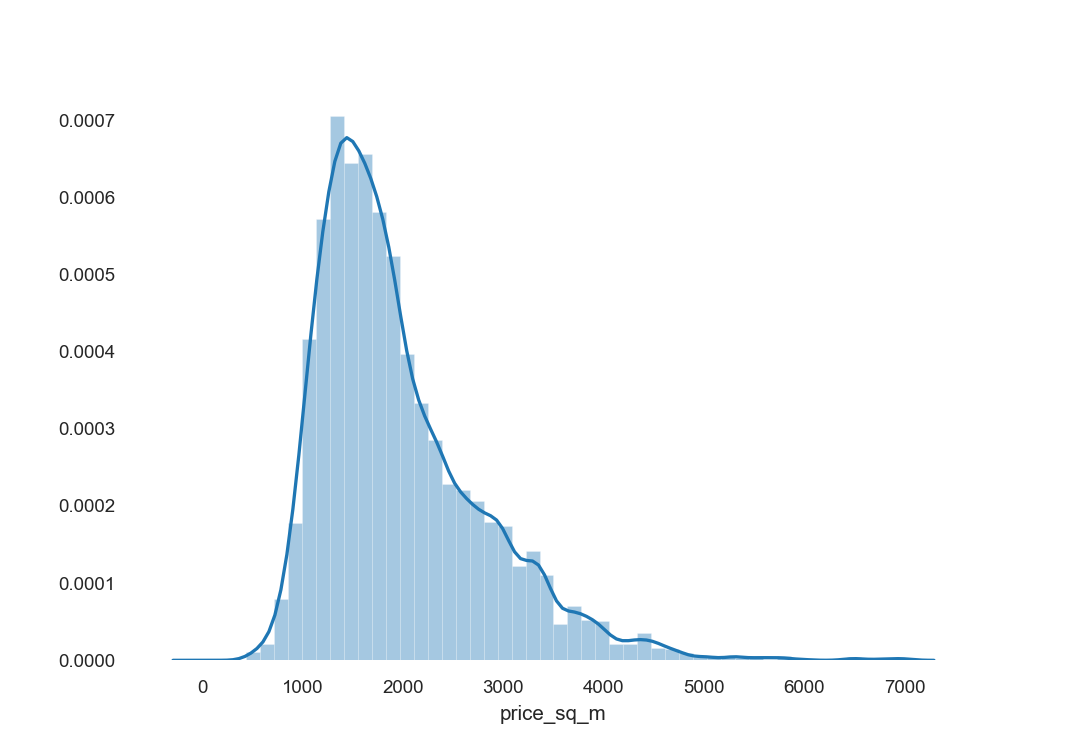

In [31]:
fig5 = plt.figure()
sns.distplot(df_raw['price_sq_m']);
plt.show()

<IPython.core.display.Javascript object>


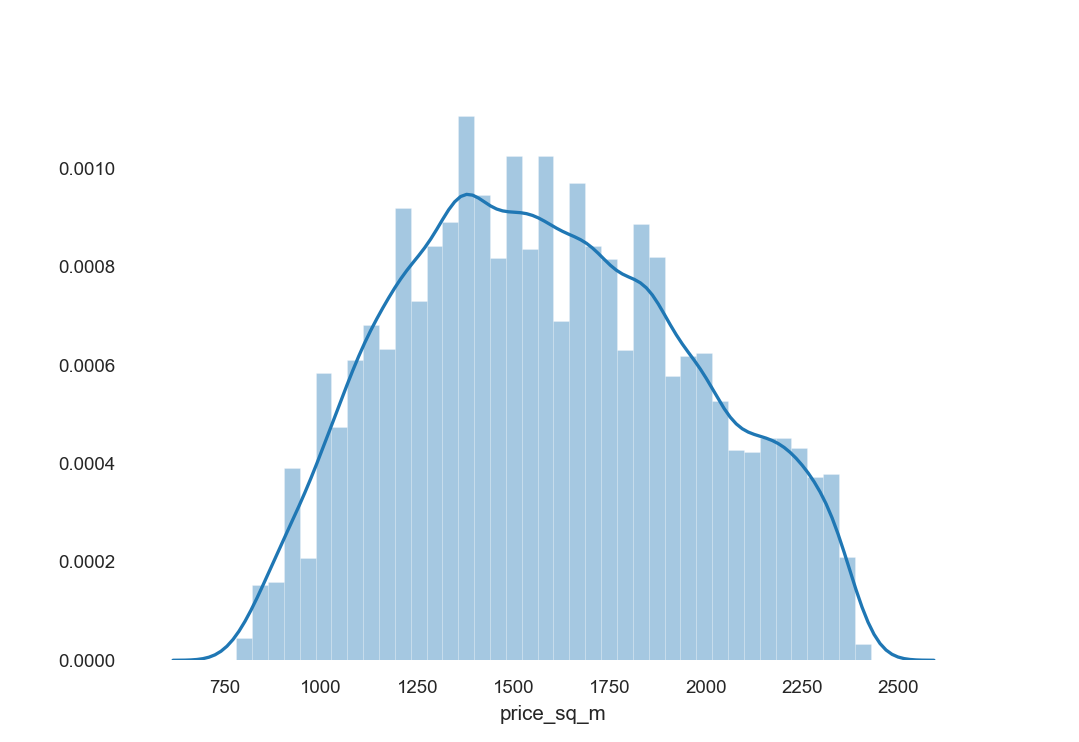

In [32]:
fig6 = plt.figure()
sns.distplot(df['price_sq_m']);
plt.show()